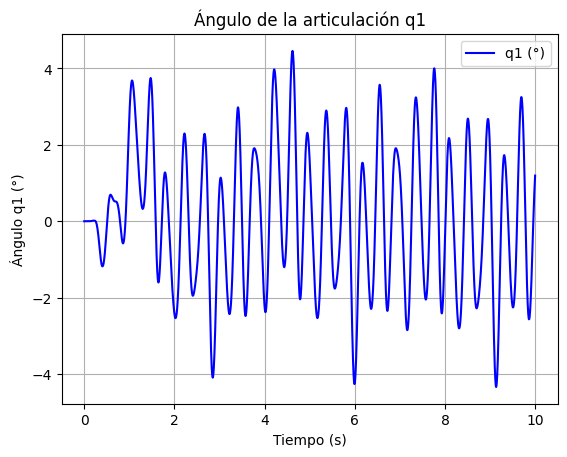

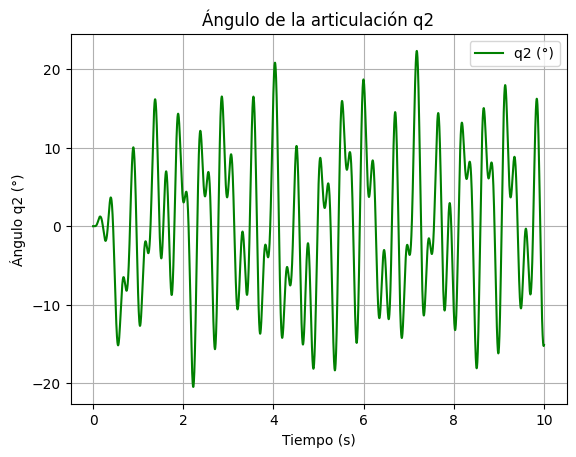

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def robot_planar_2gdl(t, x):
    q1, q2, qp1, qp2 = x
    q = np.array([q1, q2])
    qp = np.array([qp1, qp2])

    # Matriz de inercia
    M = np.array([
        [3.117 + 0.2 * np.cos(q2), 0.108 + 0.1 * np.cos(q2)],
        [0.108 + 0.1 * np.cos(q2), 0.108]
    ])

    # Fuerzas centrífugas y de coriolis
    C = np.array([
        [-0.2 * np.sin(q2) * qp2, -0.1 * np.sin(q2) * qp2],
        [ 0.1 * np.sin(q2) * qp1, 0]
    ])

    # Pares gravitacionales
    par_grav = np.array([
        39.3 * np.sin(q1) + 1.95 * np.sin(q1 + q2),
        1.95 * np.sin(q1 + q2)
    ])

    # Fricción viscosa
    fr = np.array([
        1.86 * np.sign(qp1) + 1.93 * np.sign(qp1),
        0.16 * np.sign(qp2) + 0.3 * np.sign(qp2)
    ])

    # Torque aplicado
    tau1 = (1 - np.exp(-0.8 * t)) * (32 * np.sin(16 * t + 0.1) + 12 * np.sin(20 * t + 0.15))
    tau2 = (1 - np.exp(-1.8 * t)) * (8 * np.sin(26 * t + 0.08) + 2 * np.sin(12 * t + 0.34))
    tau = np.array([tau1, tau2])

    # Aceleraciones articulares
    qpp = np.linalg.inv(M) @ (tau - C @ qp - par_grav - fr)

    return [qp1, qp2, qpp[0], qpp[1]]

# Parámetros de simulación
ti = 0
tf = 10
h = 0.0025
t_eval = np.arange(ti, tf, h)

# Condición inicial
x0 = [0, 0, 0, 0]

# Resolver la ecuación diferencial
sol = solve_ivp(robot_planar_2gdl, [ti, tf], x0, t_eval=t_eval, rtol=1e-3, atol=1e-6)

# Extraer resultados
t = sol.t
x = sol.y

# Gráfica de q1
plt.figure()
plt.plot(t, np.rad2deg(x[0]), label='q1 (°)', color='blue')
plt.xlabel("Tiempo (s)")
plt.ylabel("Ángulo q1 (°)")
plt.title("Ángulo de la articulación q1")
plt.grid()
plt.legend()
plt.show()

# Gráfica de q2
plt.figure()
plt.plot(t, np.rad2deg(x[1]), label='q2 (°)', color='green')
plt.xlabel("Tiempo (s)")
plt.ylabel("Ángulo q2 (°)")
plt.title("Ángulo de la articulación q2")
plt.grid()
plt.legend()
plt.show()
